# ISM Manufacturing PMI

ISM Manufacturing PMI reflects business conditions in the US manufacturing sector in the specified month. The Institute of Supply Management (ISM) is a not-for-profit supply management organization in the United States, which has over 40,000 members.

The index is calculated based on a survey of representatives of several hundred companies from 18 US industries. Unlike Markit, ISM considers not only private companies but is based on the common NAICS (North American Industrial Classification System) list. Respondents describe the following aspects of their economic activity:

- New orders received from clients
- Output (speed and level)
- Suppliers' delivery times (whether delivery performance is faster or slower)
- Company's inventories
- Customers' stocks (an approximate estimate of stocks stored by company's clients)
- Prices, whether the company is paying for products and services more or less
- Backlog of orders (increasing or decreasing)
- New export orders, i.e. the number of orders received for further export
- Imports — amount of imported materials
- Employment in the company

The questionnaire features relative estimates: whether the situation is better, worse or has not changed. Responses are estimated taking into account weights of respondent companies.

The values are seasonally adjusted. The resulting manufacturing PMI is a composite of five diffuse indices with different weights (New orders, Output, Employment, Supplies and Inventories).

Readings above 50 point to improvements in the industry situation. Index below 50 is an indication of contraction in economic conditions of production. The further the value moves from the mark of 50, the greater the rate of situation change.

Manufacturing PMI is **one of the most important indicators of economic health**. Although the manufacturing sector is not a very important component of national GDP, it is still an early **indicator of a coming recession or growth**. **Purchasing managers are among the first to know** when the market conditions change, since they work in the short term and can evaluate a trend towards changing economic conditions. The index is released earlier than GDP and reports from the Bureau of Labor Statistics, therefore it is a leading indicator.

Manufacturing PMI growth is usually seen as positive for the US dollar.
                
## Source
- https://www.mql5.com/en/economic-calendar/united-states/ism-manufacturing-pmi

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ISM-Manufacturing-PMI" data-toc-modified-id="ISM-Manufacturing-PMI-1">ISM Manufacturing PMI</a></span><ul class="toc-item"><li><span><a href="#Source" data-toc-modified-id="Source-1.1">Source</a></span></li></ul></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2">Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3">Read Data</a></span><ul class="toc-item"><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-3.1">Sample the data</a></span></li></ul></li><li><span><a href="#Format-Dates" data-toc-modified-id="Format-Dates-4">Format Dates</a></span></li><li><span><a href="#Rata-Die" data-toc-modified-id="Rata-Die-5">Rata Die</a></span><ul class="toc-item"><li><span><a href="#Number-the-columns" data-toc-modified-id="Number-the-columns-5.1">Number the columns</a></span></li></ul></li><li><span><a href="#Extract-only-the-desired-data" data-toc-modified-id="Extract-only-the-desired-data-6">Extract only the desired data</a></span></li><li><span><a href="#Calculate-Averages" data-toc-modified-id="Calculate-Averages-7">Calculate Averages</a></span></li></ul></div>

# Set Up

In [1]:
date_format = "yyyy.mm.dd" # 2007.04.05
show_help = false
include("MarketIndicators.jl") 

# Read Data

In [2]:
#datasets = available_datasets()

In [3]:
dataset_file_name = available_datasets()[10,2] # [row, column]
println("dataset_file_name: ", dataset_file_name)
df = fetch_dataset(dataset_file_name, date_format)
println("data dimentions: ", size(df) )
record_count = size(df)[1]
println("record_count: ", record_count )

dataset_file_name: united-states.ism-manufacturing-pmi.csv
data dimentions: (163, 4)
record_count: 163


## Sample the data

In [4]:
preview_data(df)

12×4 DataFrame
│ Row │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Date       │ Float64     │ Float64?      │ Float64?      │
├─────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 2020-09-01 │ 56.0        │ 53.4          │ 54.2          │
│ 2   │ 2019-07-01 │ 51.7        │ 52.4          │ 52.1          │
│ 3   │ 2018-05-01 │ 57.3        │ 58.5          │ 59.3          │
│ 4   │ 2017-03-01 │ 57.7        │ missing       │ 56.0          │
│ 5   │ 2016-01-04 │ 48.2        │ missing       │ 48.6          │
│ 6   │ 2014-11-03 │ 59.0        │ missing       │ 56.6          │
│ 7   │ 2013-09-03 │ 55.7        │ missing       │ 55.4          │
│ 8   │ 2012-07-02 │ 50.2        │ missing       │ 53.5          │
│ 9   │ 2011-05-02 │ 60.4        │ missing       │ 61.2          │
│ 10  │ 2010-03-01 │ 56.5        │ missing       │ 58.4          │
│ 11  │ 2009-01-02 │ 32.4        │ missing       │ 36.2          │
│ 12  │ 2007-11-01 │ 50.9        │ missing     

LoadError: UndefVarError: df1 not defined

# Format Dates

In [5]:
dates = format_dates( df[:,1] , "yy/mdd")
dates[1:5]

5-element Array{String,1}:
 "20/901"
 "20/803"
 "20/701"
 "20/601"
 "20/501"

# Rata Die

In [6]:
insert!(df, 1, zeros(Int64, record_count), :Rata_Die)
update_rata_die!(df, 1, 2) # Rata_Die column, Date column
preview_data(df)

12×5 DataFrame
│ Row │ Rata_Die │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Int64    │ Date       │ Float64     │ Float64?      │ Float64?      │
├─────┼──────────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 44073    │ 2020-09-01 │ 56.0        │ 53.4          │ 54.2          │
│ 2   │ 43645    │ 2019-07-01 │ 51.7        │ 52.4          │ 52.1          │
│ 3   │ 43219    │ 2018-05-01 │ 57.3        │ 58.5          │ 59.3          │
│ 4   │ 42793    │ 2017-03-01 │ 57.7        │ missing       │ 56.0          │
│ 5   │ 42371    │ 2016-01-04 │ 48.2        │ missing       │ 48.6          │
│ 6   │ 41944    │ 2014-11-03 │ 59.0        │ missing       │ 56.6          │
│ 7   │ 41518    │ 2013-09-03 │ 55.7        │ missing       │ 55.4          │
│ 8   │ 41090    │ 2012-07-02 │ 50.2        │ missing       │ 53.5          │
│ 9   │ 40663    │ 2011-05-02 │ 60.4        │ missing       │ 61.2          │
│ 10  │ 40236    │ 2010-03-01 │ 56.5        │ mis

LoadError: UndefVarError: df1 not defined

## Number the columns

In [7]:
# sample the values in the columns
columns = names(df)
for i in 1:length(columns)
    println(i, " ", columns[i])
end

1 Rata_Die
2 Date
3 ActualValue
4 ForecastValue
5 PreviousValue


# Extract only the desired data

In [8]:
using DataFrames
df1 = DataFrame( Day = df[:,1], 
                Date = df[:,2],
                Actual = df[:,3]
               )

preview_data( df1)

println("\n Dataset dimentions: ", size(df1) )
println("\n Column numbering:")
columns = names(df1)
for i in 1:length(columns)
    println(i, " ", columns[i])
end

12×3 DataFrame
│ Row │ Day   │ Date       │ Actual  │
│     │ Int64 │ Date       │ Float64 │
├─────┼───────┼────────────┼─────────┤
│ 1   │ 44073 │ 2020-09-01 │ 56.0    │
│ 2   │ 43645 │ 2019-07-01 │ 51.7    │
│ 3   │ 43219 │ 2018-05-01 │ 57.3    │
│ 4   │ 42793 │ 2017-03-01 │ 57.7    │
│ 5   │ 42371 │ 2016-01-04 │ 48.2    │
│ 6   │ 41944 │ 2014-11-03 │ 59.0    │
│ 7   │ 41518 │ 2013-09-03 │ 55.7    │
│ 8   │ 41090 │ 2012-07-02 │ 50.2    │
│ 9   │ 40663 │ 2011-05-02 │ 60.4    │
│ 10  │ 40236 │ 2010-03-01 │ 56.5    │
│ 11  │ 39813 │ 2009-01-02 │ 32.4    │
│ 12  │ 39385 │ 2007-11-01 │ 50.9    │
 Dataset dimentions: (163, 3)

 Column numbering:
1 Day
2 Date
3 Actual

 Dataset dimentions: (163, 3)

 Column numbering:
1 Day
2 Date
3 Actual


# Calculate Averages

In [9]:
add_overal_mean!(df1)
columns= preview_data( df1)

12×4 DataFrame
│ Row │ Day   │ Date       │ Actual  │ Mean    │
│     │ Int64 │ Date       │ Float64 │ Float64 │
├─────┼───────┼────────────┼─────────┼─────────┤
│ 1   │ 44073 │ 2020-09-01 │ 56.0    │ 52.8    │
│ 2   │ 43645 │ 2019-07-01 │ 51.7    │ 52.8    │
│ 3   │ 43219 │ 2018-05-01 │ 57.3    │ 52.8    │
│ 4   │ 42793 │ 2017-03-01 │ 57.7    │ 52.8    │
│ 5   │ 42371 │ 2016-01-04 │ 48.2    │ 52.8    │
│ 6   │ 41944 │ 2014-11-03 │ 59.0    │ 52.8    │
│ 7   │ 41518 │ 2013-09-03 │ 55.7    │ 52.8    │
│ 8   │ 41090 │ 2012-07-02 │ 50.2    │ 52.8    │
│ 9   │ 40663 │ 2011-05-02 │ 60.4    │ 52.8    │
│ 10  │ 40236 │ 2010-03-01 │ 56.5    │ 52.8    │
│ 11  │ 39813 │ 2009-01-02 │ 32.4    │ 52.8    │
│ 12  │ 39385 │ 2007-11-01 │ 50.9    │ 52.8    │
 Dataset dimentions: (163, 4)

 Column numbering:
1 Day
2 Date
3 Actual
4 Mean


4-element Array{String,1}:
 "Day"
 "Date"
 "Actual"
 "Mean"

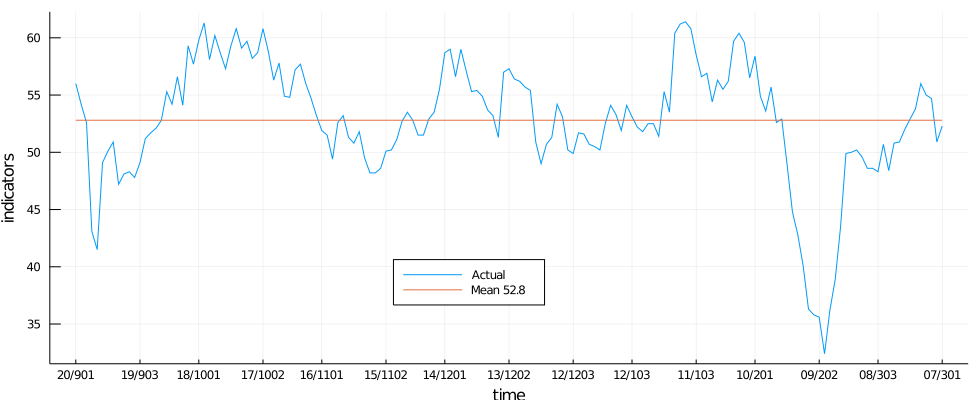

In [14]:
using Plots

# show range
rows = 1:record_count

gr()
plot(          dates[rows], # x-axis: dates
               [  df1[rows,3] df1[rows,4]   ], # y-axis
    label    = [  columns[3]  string(columns[4], " ", df1[1,4])   ]  ,
    legend   =:bottom, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )